In [1]:
import numpy as np
import plotly.express as px
import pandas as pd
import torch
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Above the necessary packages were used for the data exploration and pattern searching needed to find what makes a good fpl selection

In [2]:
Prem_df = pd.read_csv('players.csv')
print(Prem_df.columns)

Index(['id', 'name', 'now_cost', 'position', 'team', 'clean_sheets_per_90',
       'threat_rank_type', 'expected_assists_per_90', 'expected_assists',
       'points_per_game_rank', 'goals_scored', 'penalties_missed',
       'creativity_rank_type', 'transfers_out', 'value_form', 'value_season',
       'bonus', 'starts_per_90', 'cost_change_start',
       'expected_goals_conceded', 'cost_change_start_fall',
       'expected_goals_conceded_per_90', 'red_cards', 'threat',
       'selected_rank_type', 'influence', 'penalties_saved', 'ep_next',
       'event_points', 'creativity', 'ict_index_rank', 'saves_per_90',
       'creativity_rank', 'expected_goals', 'own_goals', 'status',
       'now_cost_rank_type', 'saves', 'yellow_cards', 'goals_conceded',
       'expected_goal_involvements_per_90', 'assists', 'form_rank_type',
       'ict_index_rank_type', 'chance_of_playing_next_round', 'influence_rank',
       'penalties_order', 'ict_index', 'form', 'dreamteam_count',
       'expected_goal_invo

Always good to see what columns you are working with, data is slightly augmented in comparison to pure excel sheet to remove columns which in my personal opinion didnt matter (news etc)

In [3]:
# Drop names, direct_freekicks_order, news_added, corners_and_indirect_freekicks_order, web_name, news ---->> All lead to correlation with points_per_game_rank
#Cleaning Data/PreProcessing Data

#Drop columns that are not needed

Prem_df.drop(Prem_df.columns[1], axis=1, inplace=True)
label_encoder = preprocessing.LabelEncoder()
Prem_df.iloc[:, 3] = label_encoder.fit_transform(Prem_df.iloc[:, 3])
Prem_df.iloc[:, 4] = label_encoder.fit_transform(Prem_df.iloc[:, 4])


C:\Users\Natha\AppData\Local\Temp\ipykernel_20156\1230184319.py:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  Prem_df.iloc[:, 3] = label_encoder.fit_transform(Prem_df.iloc[:, 3])
C:\Users\Natha\AppData\Local\Temp\ipykernel_20156\1230184319.py:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  Prem_df.iloc[:, 4] = label_encoder.fit_transform(Prem_df.iloc[:, 4])


Changing categorical columns to numerical works for linear regression but not for correlation

C:\Users\Natha\AppData\Local\Temp\ipykernel_20156\3303852271.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Prem_df.corr(), cmap='coolwarm', center=0, linewidths=0.5)


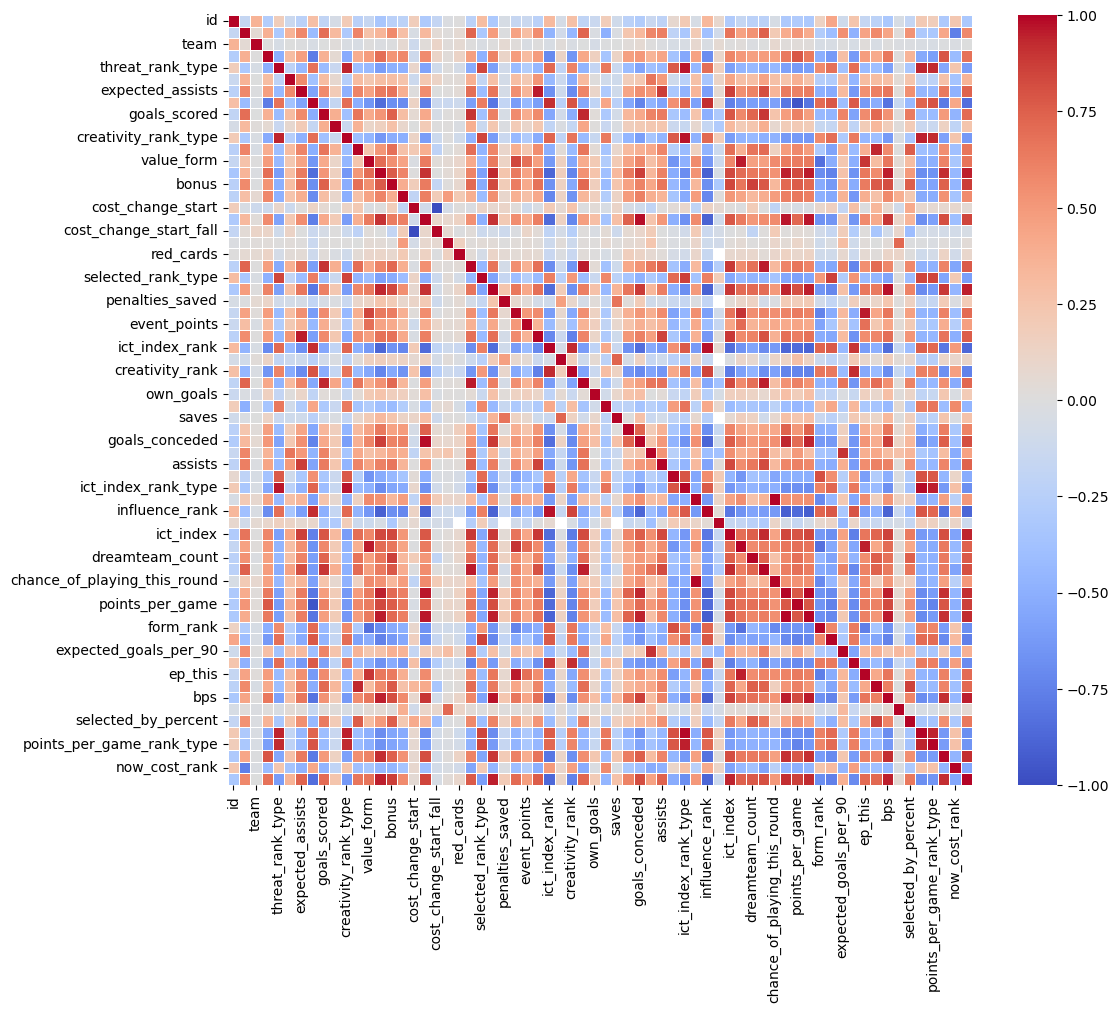

In [4]:
plt.figure(figsize=(12, 10))
# Create a heatmap
sns.heatmap(Prem_df.corr(), cmap='coolwarm', center=0, linewidths=0.5)
# Display the heatmap
plt.show()

<Axes: >

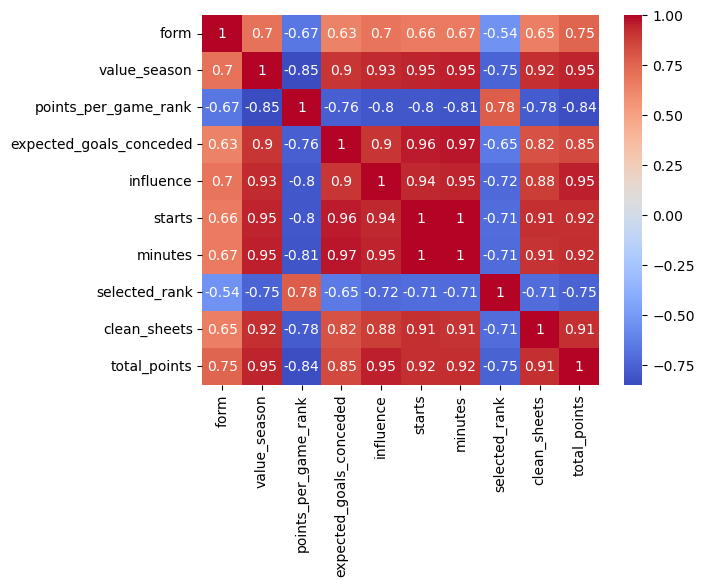

In [5]:
#To explore would be the value_season, points_per_game_rank, expected_gaosl_conceded, influence, starts, mimutes, selected_rank, clean_sheets with total points 

Prem_df_subset = Prem_df[['form','value_season', 'points_per_game_rank', 'expected_goals_conceded', 'influence', 'starts', 'minutes', 'selected_rank', 'clean_sheets','total_points']]
sns.heatmap(Prem_df_subset.corr(), annot=True, cmap='coolwarm')

In [6]:
Features_main = Prem_df_subset[['form','value_season','points_per_game_rank','expected_goals_conceded','influence','starts','minutes','selected_rank','clean_sheets']]
Labels_main = Prem_df_subset[['total_points']]

for feature_column in Features_main.columns:
    fig = px.scatter(x=Features_main[feature_column], y=Labels_main['total_points'], title=f'Scatter Plot: {feature_column} vs Total Points')
    fig.update_layout(title_x=0.5)
    fig.show()




From the above scatter plots its evident that there is a strong correlation in these variables, causation doesnt matter here. An explanation of what makes a good fpl choice is irrelevant we just need the points. Global variables will be considered in a linear regression model to see how easily a good player can be predicted. The individual groups will later be broken down. 

In [7]:
#Normalise data points with standard scaler
Normalise = StandardScaler()

X_main = Normalise.fit_transform(Features_main)
Y_main = Normalise.fit_transform(Labels_main)

#Split data into training and testing sets
X_main_train, X_main_test, Y_main_train, Y_main_test = train_test_split(X_main, Y_main, test_size=0.2, random_state=42)
                                                                        
#Linear Regression
Theta = np.linalg.inv(X_main_train.T.dot(X_main_train)).dot(X_main_train.T).dot(Y_main_train)
Y_main_pred = X_main_test.dot(Theta)

MSE_main = mean_squared_error(Y_main_test, Y_main_pred)
print("MSE: ", MSE_main)

fixed_color = "blue" 
fixed_color = "red" # You can use any valid color name or code

# Create the scatter plot using Plotly Express
x_line = np.linspace(min(Y_main_test[:, 0]), max(Y_main_test[:, 0]),100) 
y_line = x_line
fig_results = px.scatter(x=Y_main_test[:, 0],y=Y_main_pred[:, 0],color_discrete_map={fixed_color: fixed_color},  title="Actual vs Predicted")
line_color = 'red'  # Change to the desired color
fig_results.add_trace(px.line(x=x_line, y=y_line, color_discrete_sequence=[line_color]).data[0])
fig_results.show()

MSE:  0.05844159253977013


From what we have seen inputting the following features with predict the given labels to a certain degree of accuracy, there exists greater linearity towards the lower input values which could suggest non-linearities at extremities 

In [8]:
Prem_def_df = Prem_df[Prem_df['position'] == 'DEF']

C:\Users\Natha\AppData\Local\Temp\ipykernel_20156\2304074708.py:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



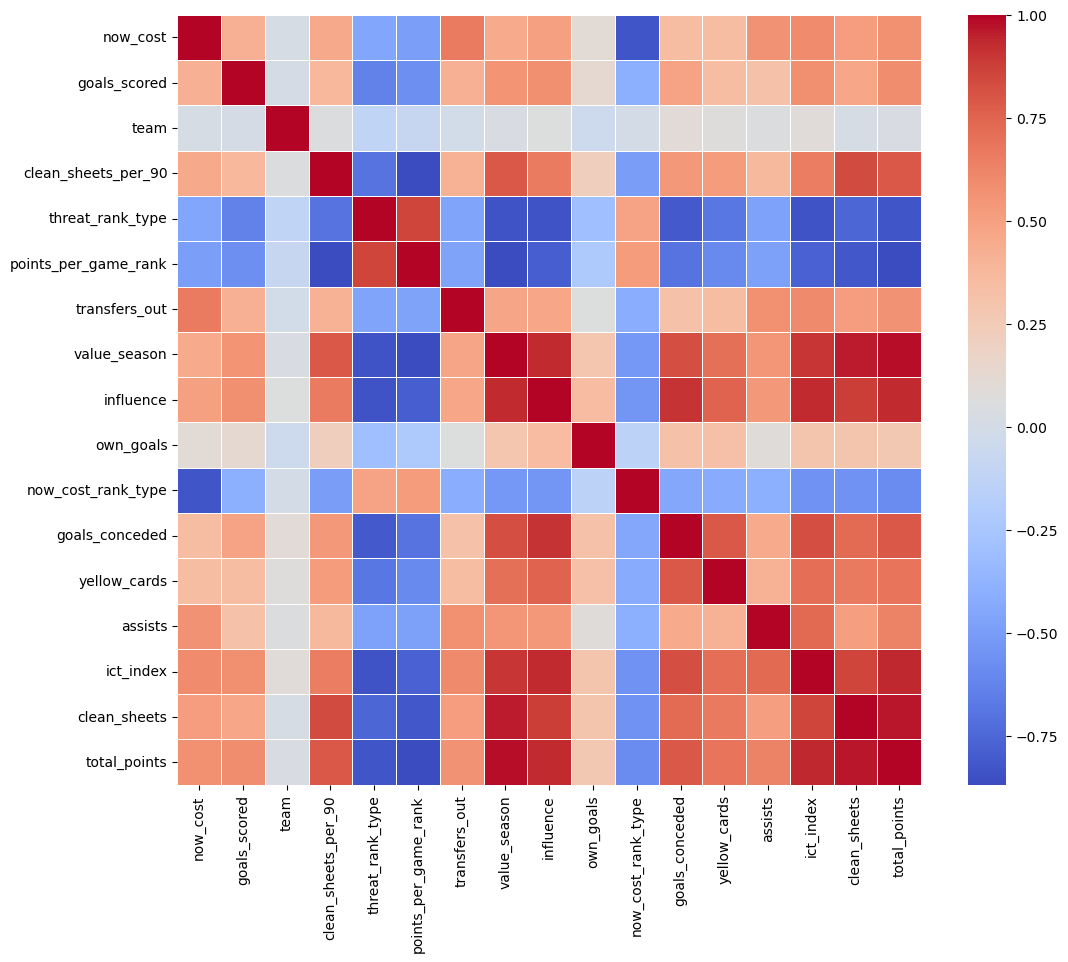

In [9]:
Prem_def_df = Prem_def_df[['now_cost','goals_scored','team','clean_sheets_per_90','threat_rank_type','points_per_game_rank','transfers_out','value_season','influence','own_goals','now_cost_rank_type','status','goals_conceded','yellow_cards','assists','ict_index','clean_sheets','total_points']]

plt.figure(figsize=(12, 10))
# Create a heatmap
sns.heatmap(Prem_def_df.corr(), cmap='coolwarm', linewidths=0.5)
# Display the heatmap
plt.show()

Here clearly suggests that the big values for a defendeer are purely on the season value, influence, ict index and clean sheets, yellow cards, goals scored and assist aren't all that relevant. 
Choose defenders and probably GK from teams with a low goal difference/5 at the back for the best results on fpl. Goal scoring defenders aren't important as those keeping clean sheets. For a defender, the columns highlighted as important are the ICT INDEX AND CLEAN SHEETS, CLEAN_SHEETS_PER90 AND GOALS_CONCEDED

In [10]:
Prem_mid_df = Prem_df[Prem_df['position'] == 'MID']

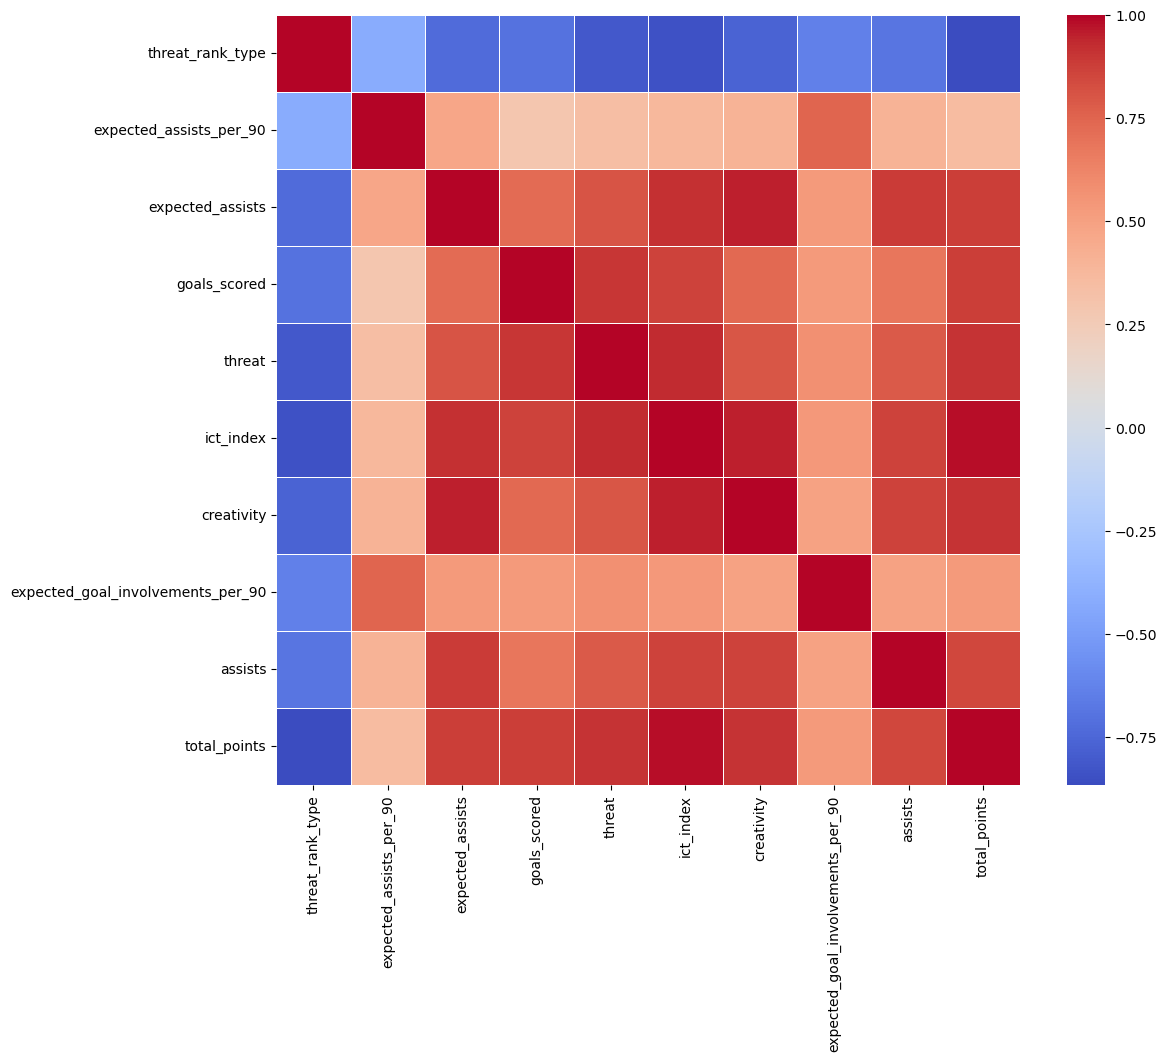

In [11]:
Prem_mid_df = Prem_mid_df[['threat_rank_type','expected_assists_per_90','expected_assists','goals_scored','threat','ict_index','creativity','expected_goal_involvements_per_90','assists','total_points']]
plt.figure(figsize=(12, 10))
# Create a heatmap
sns.heatmap(Prem_mid_df.corr(), cmap='coolwarm', linewidths=0.5)
# Display the heatmap
plt.show()

For a midfielder, the relevant categories are expected_assists/assists, goals_scored (goal contributions), threat, ict_index, creativity 

In [12]:
Prem_att_df = Prem_df[Prem_df['position'] == 'ATT']
Prem_att_df.dropna()
print(Prem_att_df.columns)

Index(['id', 'now_cost', 'position', 'team', 'clean_sheets_per_90',
       'threat_rank_type', 'expected_assists_per_90', 'expected_assists',
       'points_per_game_rank', 'goals_scored', 'penalties_missed',
       'creativity_rank_type', 'transfers_out', 'value_form', 'value_season',
       'bonus', 'starts_per_90', 'cost_change_start',
       'expected_goals_conceded', 'cost_change_start_fall',
       'expected_goals_conceded_per_90', 'red_cards', 'threat',
       'selected_rank_type', 'influence', 'penalties_saved', 'ep_next',
       'event_points', 'creativity', 'ict_index_rank', 'saves_per_90',
       'creativity_rank', 'expected_goals', 'own_goals', 'status',
       'now_cost_rank_type', 'saves', 'yellow_cards', 'goals_conceded',
       'expected_goal_involvements_per_90', 'assists', 'form_rank_type',
       'ict_index_rank_type', 'chance_of_playing_next_round', 'influence_rank',
       'penalties_order', 'ict_index', 'form', 'dreamteam_count',
       'expected_goal_involvements

Data was misbehaving for attackers, need to investigate soon but NN is next...we move

In [25]:
Features_nn = Prem_df[['clean_sheets_per_90','expected_assists','goals_scored','value_form','threat','ict_index','influence','starts','minutes','clean_sheets','expected_goals','assists']]
Labels_nn = Prem_df['total_points']

#Normalise data points with standard scaler
Normalise = StandardScaler()

X_main_nn = Normalise.fit_transform(Features_nn.values)
Y_main_nn = Normalise.fit_transform(Labels_nn.values.reshape(-1,1))

#Split data into training and testing sets
X_main_train_nn, X_main_test_nn, Y_main_train_nn, Y_main_test_nn = train_test_split(X_main_nn, Y_main_nn, test_size=0.2, random_state=42)

#Turn data into tensors
X_main_train_nn = torch.FloatTensor(X_main_train_nn)
X_main_test_nn = torch.FloatTensor(X_main_test_nn)
Y_main_train_nn = torch.FloatTensor(Y_main_train_nn)
Y_main_test_nn = torch.FloatTensor(Y_main_test_nn)

In [26]:
#Neural Network Model
model = torch.nn.Sequential(
    torch.nn.Linear(12, 48),
    torch.nn.ReLU(),
    torch.nn.Linear(48, 48),
    torch.nn.ReLU(),
    torch.nn.Linear(48, 4),
    torch.nn.ReLU(),
    torch.nn.Linear(4, 1),
)
print(model)

Sequential(
  (0): Linear(in_features=12, out_features=48, bias=True)
  (1): ReLU()
  (2): Linear(in_features=48, out_features=48, bias=True)
  (3): ReLU()
  (4): Linear(in_features=48, out_features=4, bias=True)
  (5): ReLU()
  (6): Linear(in_features=4, out_features=1, bias=True)
)


In [32]:
loss_function = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)


In [33]:
n_epochs = 50
batch_size = 5

In [34]:
for epoch in range(n_epochs):
    for i in range(0,len(X_main_train_nn),batch_size):
        X_batch = X_main_train_nn[i:i+batch_size]
        Y_pred = model(X_batch)
        Y_batch = Y_main_train_nn[i:i+batch_size]
        loss = loss_function(Y_pred,Y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if epoch%10 == 0:
        print("Epoch: ",epoch," Loss: ",loss.item())

Epoch:  0  Loss:  6.215315806912258e-05
Epoch:  10  Loss:  0.000117777097329963
Epoch:  20  Loss:  0.00012550032988656312
Epoch:  30  Loss:  0.00011463391274446622
Epoch:  40  Loss:  0.00010393228876637295


In [45]:
model.eval() # Set model to evaluate mode
with torch.no_grad():
    Y_pred = model(X_main_test_nn)

threshold = 0.1
accurate_predictions = torch.abs(Y_pred- Y_main_test_nn) <= threshold
accuracy = accurate_predictions.float().mean().item() * 100

print(f"Accuracy-like value on test data: {accuracy:.2f}%")

print(Y_main_test_nn)

Accuracy-like value on test data: 80.13%
tensor([[-0.8410],
        [-0.8410],
        [-0.3254],
        [-0.8410],
        [-0.4491],
        [ 0.1696],
        [-0.8410],
        [-0.7585],
        [-0.8410],
        [ 0.2521],
        [ 0.8502],
        [-0.7997],
        [ 0.3965],
        [-0.8410],
        [-0.7379],
        [-0.2429],
        [ 1.7164],
        [-0.8410],
        [ 0.4583],
        [-0.8410],
        [-0.8410],
        [-0.8204],
        [ 0.6852],
        [-0.8410],
        [ 1.7371],
        [-0.5110],
        [ 0.4583],
        [ 2.5002],
        [-0.5110],
        [ 0.1902],
        [-0.7791],
        [-0.7172],
        [ 2.2527],
        [-0.8410],
        [ 0.7058],
        [-0.4697],
        [-0.2841],
        [ 0.4377],
        [ 1.3658],
        [ 3.2426],
        [-0.8410],
        [-0.1191],
        [-0.8410],
        [-0.2841],
        [ 1.2627],
        [-0.0366],
        [-0.8410],
        [-0.8410],
        [-0.8410],
        [-0.8410],
        [